Building CNN model to find the numbers using MNIST dataset

In [1]:
# Importing the necessary packages

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the mnist dataset from tensorflow
(train_image, train_labels), (test_image, test_labels) = tf.keras.datasets.mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

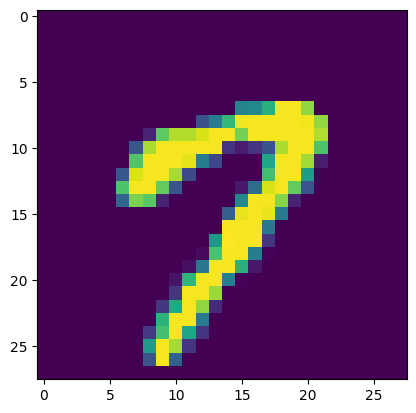

In [3]:
# Visulaize the dataset both image and array

plt.imshow(train_image[15])
print(train_image[15])

In [4]:
# normalizing the dataset

max_len = train_image.max()

train_image = train_image.astype('float')/max_len
test_image = test_image.astype('float')/max_len

(<matplotlib.image.AxesImage at 0x7d2ecf31be90>, np.uint8(7))

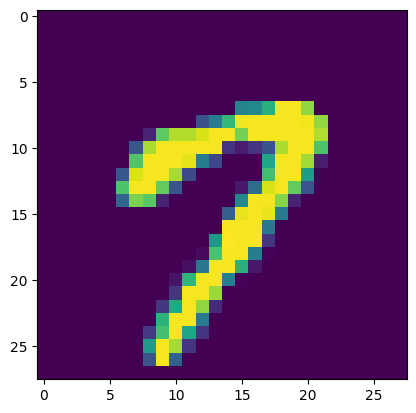

In [5]:
# Dataset image after normalization

plt.imshow(train_image[15]), train_labels[15]

In [6]:
# Converting the images into mono channel image

train_image = train_image.reshape(-1, 28, 28, 1)
test_image = test_image.reshape(-1, 28, 28, 1)



In [7]:
# Transforming the categorical labels into one hot encoded labels

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [8]:
# Data agumentation to avoid overfitting

data_agumentation = tf.keras.Sequential([
    keras.layers.RandomRotation(0.10),  # Rotate the image +-10%
    keras.layers.RandomZoom(0.10)   # Zoom the image +-10%
])

In [9]:
def build_model():
    model = keras.models.Sequential([
        data_agumentation,

        # Layer 1
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),# Convolution layer to detect edges, textures. 3x3 is kernel size
        keras.layers.BatchNormalization(), # Regularizing the convolution output
        keras.layers.MaxPooling2D((2, 2)), # Down sample the normalization output by 2x2

        # Layer 2
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(), # Mandatory for CNN
        keras.layers.MaxPooling2D((2, 2)),

        # Layer 3
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Flatten(),

        keras.layers.Dense(128, activation = 'relu'),

        keras.layers.Dropout(0.5), # Dropout to avoid overfiting, It randomly removes the 5% of neuron memory

        keras.layers.Dense(10, activation = 'softmax')
    ])

    return model

In [10]:
model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # Compile model with optimizer, loss and metrics

model.summary() # model architecture

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Early stopping to stop the model training once the weights are saturated

early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# ReduceLROnPlateau to reduce learning rate when the model perfomance is improving, it saves training time

reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)


In [13]:
history = model.fit(train_image, train_labels, callbacks = [early_stopping, reduce_lr], epochs = 30, batch_size=10, validation_split = 0.10)

Epoch 1/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - accuracy: 0.8596 - loss: 0.4542 - val_accuracy: 0.9780 - val_loss: 0.0767 - learning_rate: 0.0010
Epoch 2/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.9566 - loss: 0.1546 - val_accuracy: 0.9848 - val_loss: 0.0651 - learning_rate: 0.0010
Epoch 3/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.9673 - loss: 0.1140 - val_accuracy: 0.9835 - val_loss: 0.0714 - learning_rate: 0.0010
Epoch 4/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 50s 9ms/step - accuracy: 0.9687 - loss: 0.1065 - val_accuracy: 0.9875 - val_loss: 0.0526 - learning_rate: 0.0010
Epoch 5/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - accuracy: 0.9736 - loss: 0.0930 - val_accuracy: 0.9845 - val_loss: 0.0638 - learning_rate: 0.0010
Epoch 6/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.9776 - loss: 0.0802 - val_accuracy: 0.9878 - val_loss: 0.0447 - learning_rate: 0.0010
Epoch 7/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.

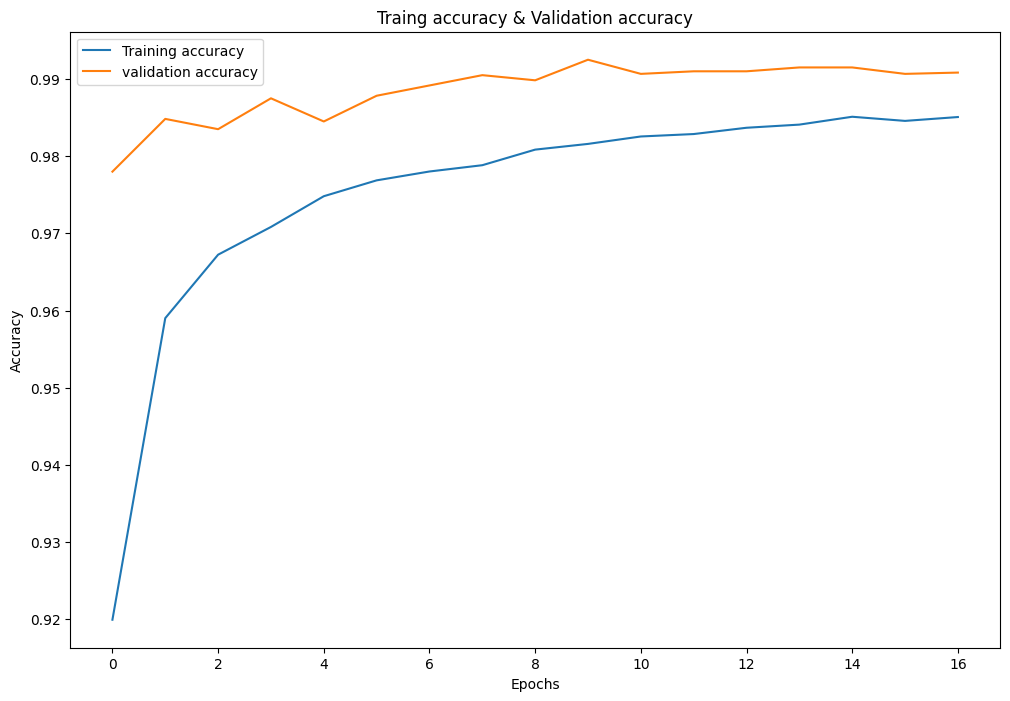

In [15]:
# Visualizing the accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Traing accuracy & Validation accuracy')
plt.legend()
plt.show()


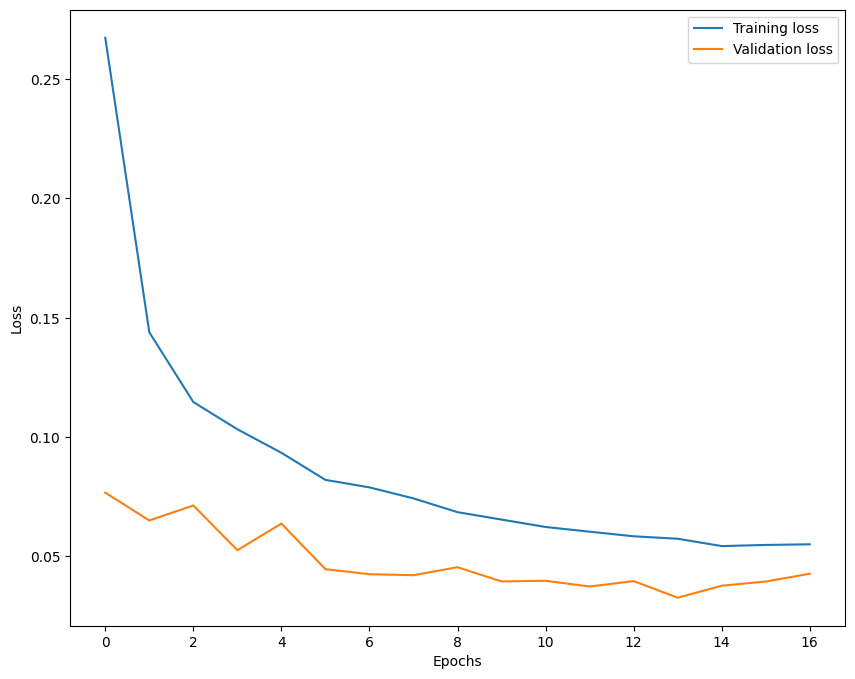

In [16]:
# visualizing the loss

plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
loss, accuracy = model.evaluate(test_image, test_labels)
print('Loss -> ', loss, '\nAccuracy -> ', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0393
Loss ->  0.030608966946601868 
Accuracy ->  0.9914000034332275
